## Data set
https://data.buenosaires.gob.ar/dataset/seguridad-vial-autopistas-ausa

## Se descargo el dataset: 18/9/2021

## Objetivo: Segun el tipo de accidente y las condiciones climaticas se busca predecir que autopista tuvo mayor fallecidos y lesionados. (segun tipo de vehiculo)

In [193]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

### La ruta donde se encuentra el archivo

In [194]:
pwd

'C:\\Users\\Usuario\\Documents\\UTN\\5 electiva ciencia de datos\\clusterai_2021-main'

In [195]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 265A-0EB9

 Directorio de C:\Users\Usuario\Documents\UTN\5 electiva ciencia de datos\clusterai_2021-main

22/11/2021  23:09    <DIR>          .
22/11/2021  23:09    <DIR>          ..
15/10/2021  14:34                70 .gitignore
06/11/2021  11:33    <DIR>          .ipynb_checkpoints
15/10/2021  14:34    <DIR>          clase00
18/10/2021  17:56    <DIR>          clase01
15/10/2021  14:34    <DIR>          clase02
15/10/2021  14:34    <DIR>          clase03
15/10/2021  14:34    <DIR>          clase04
15/10/2021  14:34    <DIR>          clase05
15/10/2021  14:34    <DIR>          clase06
16/10/2021  11:47    <DIR>          clase07
23/10/2021  11:04    <DIR>          clase08
15/10/2021  14:34            35.149 LICENSE
15/10/2021  14:34             6.085 README.md
22/11/2021  23:08    <DIR>          tp
22/11/2021  23:09           792.569 Untitled.ipynb
               4 archivos        833.873 bytes
          

In [196]:
# Importamos el data set
google_df = pd.read_csv('C:\\Users\\Usuario\\Documents\\UTN\\5 electiva ciencia de datos\\clusterai_2021-main\\tp\\seguridadvial.csv',sep='delimiter',delimiter=';',parse_dates=['fecha'])

In [197]:
# se muesta la tabla del DataSet
google_df.head()

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,2014-01-01,1.0,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0
1,2014-01-01,3.0,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0
2,2014-01-01,22.0,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0.0,COLISION CON DOS O MAS VEHICULOS,0,2.0,0.0,0.0
3,2014-03-01,7.0,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0.0,OBSTACULO NO FIJO,0,0.0,0.0,1.0
4,2014-03-01,21.0,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,2.0,0.0,0.0


In [198]:
# Se muestra la cantidad de columnas y filas que contiene
np.shape(google_df)

(7303, 14)

In [199]:
google_df['index'] = google_df.index

In [200]:
google_df.dtypes

fecha                         datetime64[ns]
hora                                 float64
autopista                             object
banda_y_o_ramal                       object
pk                                    object
condiciones_meteorologicas            object
superficie_de_la_via                  object
lesionados                            object
fallecidos                           float64
tipo_de_siniestro                     object
moto                                  object
liviano                              float64
bus                                  float64
camion                               float64
index                                  int64
dtype: object

In [201]:
google_df["fecha"] = pd.to_datetime(arg=google_df["fecha"], format="%Y-%m-%d");
google_df["diasemanal"]= google_df["fecha"].dt.day_name()

## Se muestra la columna hora para ver que valores contiene
### Se verifica visualmente

In [202]:
google_df['hora'].unique()

array([ 1.,  3., 22.,  7., 21.,  9., 19., 15., 10., 11.,  6., 14., 20.,
        0., 13., 18.,  8.,  2., 16., 17.,  4., 23., 12.,  5., nan])

In [203]:
# se observa valores "nan" y se procede analizar que columnas contienen vacios
col_NaN = google_df.isnull().any()
print(col_NaN,'\r\n')

fecha                          True
hora                           True
autopista                      True
banda_y_o_ramal                True
pk                             True
condiciones_meteorologicas     True
superficie_de_la_via           True
lesionados                     True
fallecidos                     True
tipo_de_siniestro              True
moto                           True
liviano                        True
bus                            True
camion                         True
index                         False
diasemanal                     True
dtype: bool 



In [204]:
total = google_df.isnull().sum().sort_values(ascending=False)
total

fecha                         52
hora                          52
autopista                     52
banda_y_o_ramal               52
pk                            52
condiciones_meteorologicas    52
superficie_de_la_via          52
lesionados                    52
fallecidos                    52
tipo_de_siniestro             52
moto                          52
liviano                       52
bus                           52
camion                        52
diasemanal                    52
index                          0
dtype: int64

In [205]:
total = google_df.isnull().sum().sort_values(ascending=False)
percent = (google_df.isnull().sum()/google_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fecha,52,0.00712
hora,52,0.00712
autopista,52,0.00712
banda_y_o_ramal,52,0.00712
pk,52,0.00712
condiciones_meteorologicas,52,0.00712
superficie_de_la_via,52,0.00712
lesionados,52,0.00712
fallecidos,52,0.00712
tipo_de_siniestro,52,0.00712


In [206]:
# se elimina las columnas vacias
google_df.dropna(how='any', inplace = True)

In [207]:
print(f'nos quedamos con un dateframe de {google_df.shape[0]} filas x {google_df.shape[1]} columnas')

nos quedamos con un dateframe de 7251 filas x 16 columnas


In [208]:
google_df['hora'].unique()

array([ 1.,  3., 22.,  7., 21.,  9., 19., 15., 10., 11.,  6., 14., 20.,
        0., 13., 18.,  8.,  2., 16., 17.,  4., 23., 12.,  5.])

In [209]:
google_df['hora'] = google_df['hora'].astype(int)

## Se muestra si la columna autopista contiene valores repetidos
### Se verifica visualmente.

In [210]:
google_df['autopista'].unique()

array(['AU CAMPORA', 'AU DELLEPIANE', 'AU 25 DE MAYO', 'AU PERTIO MORENO',
       'AV LUGONES', 'AV CANTILO', 'AU FRONDIZI', 'AU ILLIA',
       'AV. LUGONES', 'AU PERITO MORENO', 'DIST. 9 DE JULIO',
       'AV. CANTILO', 'TRANSICION RAMAL 2', 'DIST. UDAONDO',
       'TRANSICION RAMAL 3', 'PTE. SCALABRINI ORTIZ',
       'TRANSICION RAMAL 1', 'PASEO DEL BAJO', 'DIST. DELLEPIANE',
       'TRANSICION RAMAL 4'], dtype=object)

In [211]:
google_df.loc[google_df.autopista == "AV LUGONES", "autopista"] = "AV. LUGONES";

In [212]:
google_df.loc[google_df.autopista == "AU PERTIO MORENO", "autopista"] = "AU PERITO MORENO";

In [213]:
google_df.loc[google_df.autopista == "AV CANTILO", "autopista"] = "AV. CANTILO";

In [214]:
print("La cantidad de autopistas registrados son: " + str(np.shape(google_df.autopista.unique())[0]) + " autopista");

La cantidad de autopistas registrados son: 17 autopista


## Verificamos si la columna banda y/o ramal que valores contiene
### Se verifica visualmente.

In [215]:
google_df['banda_y_o_ramal'].unique()

array(['ASCENDENTE', 'DESCENDENTE', 'TRANSICION RAMAL 2',
       'TRANSICION RAMAL 4', 'TRANSICION RAMAL 3',
       'DISTRIBUIDOR 9 DE JULIO', 'PUENTE SCALABRINI ORTIZ',
       'DISTRIBUIDOR UDAONDO', 'TRANSICION RAMAL 1',
       'DISTRIBUIDOR DELLEPIANE', 'CARRIL METROBUS',
       'PUENTE ANGEL LABRUNA', 'RAMAL 1 BIS', 'RAMAL 2 BIS', 'RAMAL 6',
       'RAMAL DE ENLACE', ' ', 'RAMAL 4', 'RAMAL DE ENLACE (AU1/AU6)',
       'RAMAL 3/4', 'RAMAL 8', 'RAMAL DE EGRESO', 'RAMAL 1', 'RAMAL 3',
       'PTE. LABRUBNA', 'DIST. NORTE   RAMAL 4', 'DIST. SUR   RAMAL 1',
       'RAMAL 12', 'DIST. SUR   RAMAL 2', 'RAMAL 11',
       'DIST. RETIRO   RAMAL 3', '-', 'RAMAL DE INGRESO'], dtype=object)

### Se procede a eliminar banda y o ramal debido a que se considera informacion irrelevante para analizar

In [216]:
google_df = google_df.drop("banda_y_o_ramal", axis=1);

In [217]:
# Se muestra para ver como queda la tabla del DataSet, despues de eliminar "banda_y_o_ramal"
google_df.head()

,fecha,hora,autopista,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,index,diasemanal
0,2014-01-01,1,AU CAMPORA,600,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,0,Wednesday
1,2014-01-01,3,AU DELLEPIANE,600,BUENO,SECA,0,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,1,Wednesday
2,2014-01-01,22,AU 25 DE MAYO,5900,BUENO,SECA,8,0.0,COLISION CON DOS O MAS VEHICULOS,0,2.0,0.0,0.0,2,Wednesday
3,2014-03-01,7,AU CAMPORA,600,BUENO,SECA,0,0.0,OBSTACULO NO FIJO,0,0.0,0.0,1.0,3,Saturday
4,2014-03-01,21,AU PERITO MORENO,5400,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,2.0,0.0,0.0,4,Saturday


## Verificamos si la columna pk que valores contiene
### Se verifica visualmente.

In [218]:
google_df['pk'].unique()

array(['600', '5900', '5400', '4700', '3800', '4000', '7000',
       'RAMAL ENLACE', '5600', '3200', '1000', '10300', 'RAMPA ACCESO',
       '9050', 'RAMPA EGRESO', '2000', '10200', '200', '4500', '8600',
       '1700', '1600', '5800', '4300', '7500', '8800', 'RAMAL 5', '5000',
       '300', '0', '5300', '2500', '5500', '7400', '2800', '9200', '2100',
       'RAMAL 2BIS', '700', '2700', '1800', '5100', '1300', '500', '7700',
       '3300', '3700', '8200', '6000', '8500', '3600', '2400', '9000',
       '3500', '6600', '9100', '6900', '800', '1100', '9600', '7200',
       '10100', '1200', '6500', '100', '3000', '5200', '2300', '1500',
       '4600', '7800', 'PUENTE S. ORTIZ', '1400', '2600', '3400', '7100',
       '400', '4200', '900', '401', '9300', '4900', '8400', '5700',
       '9800', '8700', '8000', '6100', '4800', '7600', '8300', '9400',
       '3100', '2900', '2200', '8100', '1900', '8900', 'RAMAL 3', '6200',
       '6300', '4400', '10400', '3900', '2599', '7300', 'RAMAL 2', '9700

In [219]:
google_df = google_df.drop("pk", axis=1);

In [220]:
# Se muestra para ver como queda la tabla del DataSet, despues de eliminar "pk"
google_df.head()

,fecha,hora,autopista,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,index,diasemanal
0,2014-01-01,1,AU CAMPORA,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,0,Wednesday
1,2014-01-01,3,AU DELLEPIANE,BUENO,SECA,0,0.0,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,1,Wednesday
2,2014-01-01,22,AU 25 DE MAYO,BUENO,SECA,8,0.0,COLISION CON DOS O MAS VEHICULOS,0,2.0,0.0,0.0,2,Wednesday
3,2014-03-01,7,AU CAMPORA,BUENO,SECA,0,0.0,OBSTACULO NO FIJO,0,0.0,0.0,1.0,3,Saturday
4,2014-03-01,21,AU PERITO MORENO,BUENO,SECA,1,0.0,COLISION CON OBSTACULO FIJO,0,2.0,0.0,0.0,4,Saturday


## Verificamos si la columna condiciones meteorologicas que valores contiene
### Se verifica visualmente.

In [221]:
google_df['condiciones_meteorologicas'].unique()

array(['BUENO', 'LLUVIOSO', 'VIENTOS FUERTES', '"NIEBLA', 'NIEBLA',
       '<SD>', 'NIEBLA, BRUMA O HUMO'], dtype=object)

In [222]:
(google_df["condiciones_meteorologicas"] == "NIEBLA, BRUMA O HUMO").sum()

1

In [223]:
(google_df["condiciones_meteorologicas"] == "NIEBLA").sum()

1

In [224]:
(google_df["condiciones_meteorologicas"] == '"NIEBLA').sum()

9

In [225]:
google_df.loc[google_df.condiciones_meteorologicas == "NIEBLA", "condiciones_meteorologicas"] = "NIEBLA, BRUMA O HUMO";

In [226]:
google_df.loc[google_df.condiciones_meteorologicas == '"NIEBLA', "condiciones_meteorologicas"] = "NIEBLA, BRUMA O HUMO";

In [227]:
google_df['condiciones_meteorologicas'] = google_df['condiciones_meteorologicas'].str.replace('<SD>','')

In [228]:
google_df['condiciones_meteorologicas'].unique()

array(['BUENO', 'LLUVIOSO', 'VIENTOS FUERTES', 'NIEBLA, BRUMA O HUMO', ''],
      dtype=object)

## Verificamos si la columna superficie de la via que valores contiene
### Se verifica visualmente.

In [229]:
google_df['superficie_de_la_via'].unique()

array(['SECA', 'MOJADA/HUMEDA', ' BRUMA O HUMO"', 'OTRO', 'INUNDADA',
       '<SD>'], dtype=object)

In [230]:
# Se procede a eliminar superfice de la via debido a que los valores se ven reflejados en condiciones meteorologicas
google_df = google_df.drop("superficie_de_la_via", axis=1);

## Verificamos si la columna tipo de siniestro que valores contiene
### Se verifica visualmente.
### En esta se decidio en agrupar para tener mas claridad

In [231]:
google_df['tipo_de_siniestro'].unique()

array(['COLISION CON OBSTACULO FIJO', 'COLISION CON DOS O MAS VEHICULOS',
       'OBSTACULO NO FIJO',
       'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION',
       'OTRO TIPO DE SINIESTRO', '0', 'OTRO',
       'CON DOS O MAS VEHICULOS-IMPACTO TRASERO'], dtype=object)

In [232]:
(google_df['tipo_de_siniestro'] == 'OTRO').sum()

32

In [233]:
(google_df['tipo_de_siniestro'] == 'OTRO TIPO DE SINIESTRO').sum()

23

In [234]:
google_df.loc[google_df.tipo_de_siniestro == "OTRO TIPO DE SINIESTRO", "tipo_de_siniestro"] = "OTRO";

In [235]:
google_df.loc[google_df.tipo_de_siniestro == "OTRO", "tipo_de_siniestro"] = "CON DOS O MAS VEHICULOS-IMPACTO TRASERO";

In [236]:
google_df.loc[google_df.tipo_de_siniestro == "CON DOS O MAS VEHICULOS-IMPACTO TRASERO", "tipo_de_siniestro"] = "COLISION CON DOS O MAS VEHICULOS";

In [237]:
np.shape(google_df)

(7251, 13)

In [238]:
google_df = google_df[google_df['tipo_de_siniestro'] != '0']

In [239]:
# Se verifica que se eliminaron las 9 filas de los valores "0" de tipo de siniestro
np.shape(google_df)

(7242, 13)

In [240]:
google_df['tipo_de_siniestro'].unique()

array(['COLISION CON OBSTACULO FIJO', 'COLISION CON DOS O MAS VEHICULOS',
       'OBSTACULO NO FIJO',
       'SINIESTRO DE UN SOLO VEHICULO / SIN COLISION'], dtype=object)

## Verificamos si la columna lesionados que valores contiene
### Se verifica visualmente.

In [241]:
google_df['lesionados'].unique()

array(['1', '0', '8', '3', '2', '5', '4', '6', '9', '7', '16', '10', '11',
       '17', '21'], dtype=object)

In [242]:
google_df.lesionados = google_df.lesionados.astype(int)
google_df.fallecidos = google_df.fallecidos.astype(int)

In [243]:
google_df['fallecidos'].unique()

array([0, 1, 2])

In [244]:
fallecidos_google_df = google_df[google_df["fallecidos"] != 0];
fallecidos_google_df.head()
fallecidos_google_df.groupby(['fecha'])["fallecidos"].sum()

fecha
2014-01-27    1
2014-02-02    1
2014-02-10    1
2014-09-28    1
2014-11-22    1
             ..
2021-05-26    1
2021-06-01    1
2021-07-10    1
2021-10-01    1
2021-12-01    1
Name: fallecidos, Length: 63, dtype: int32

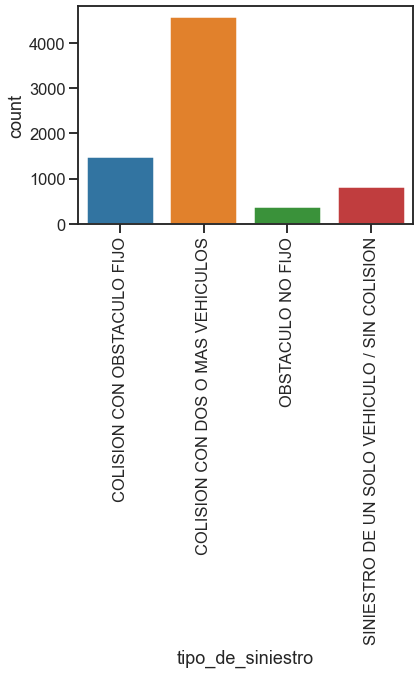

In [245]:
tipsiniestro = sns.countplot(x="tipo_de_siniestro", data=google_df) 
tipsiniestro.set_xticklabels(tipsiniestro.get_xticklabels(), rotation=90);

<AxesSubplot:xlabel='year', ylabel='count'>

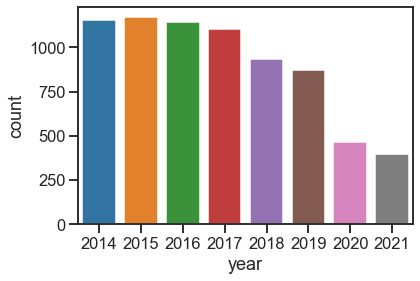

In [246]:
google_df["year"] = pd.DatetimeIndex(google_df["fecha"]).year;
sns.countplot(x="year", data=google_df)

In [247]:
accidentes_year = google_df.groupby(["year"])["lesionados", "fallecidos"].sum()
accidentes_year.head()

,lesionados,fallecidos
year,,
2014,683,6
2015,716,12
2016,683,9
2017,740,14
2018,579,5


<AxesSubplot:xlabel='diasemanal', ylabel='count'>

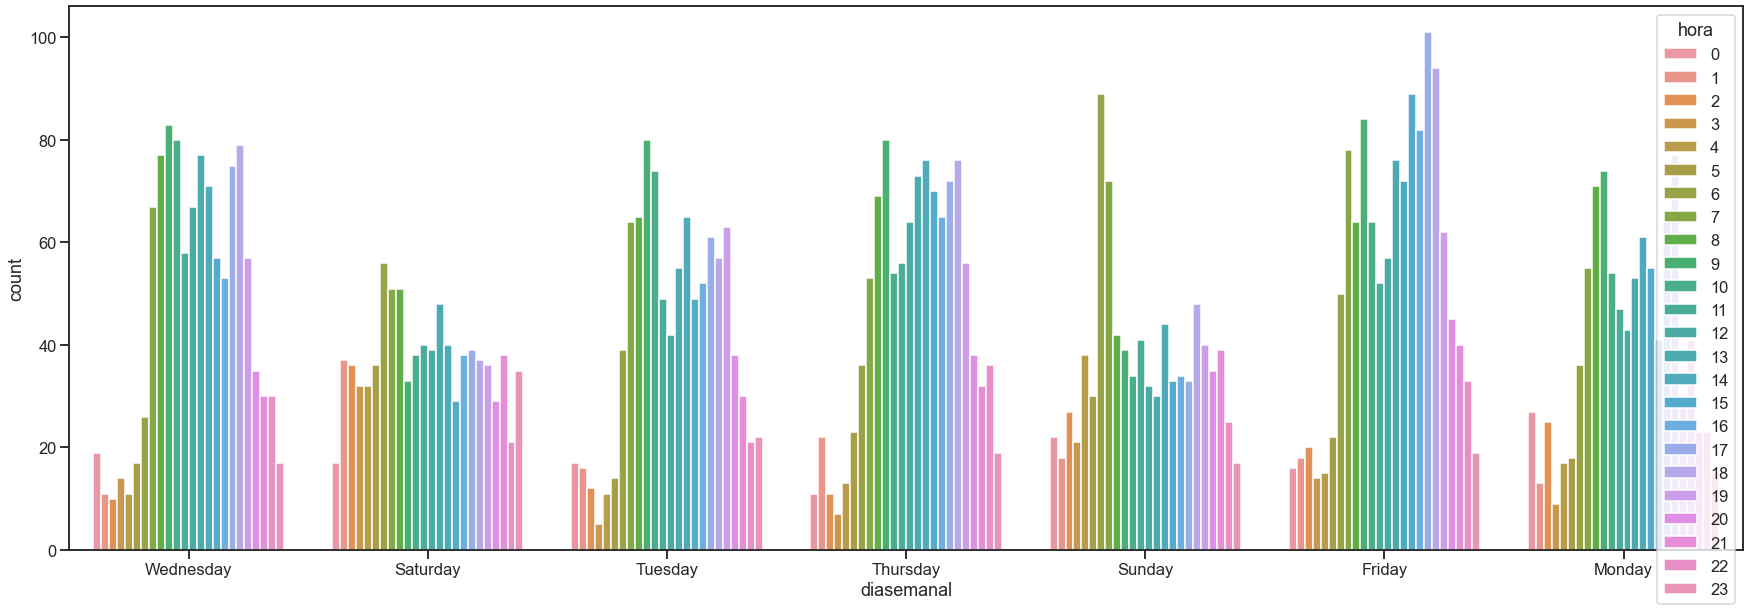

In [248]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(ax=ax, x="diasemanal", hue="hora", data=google_df)

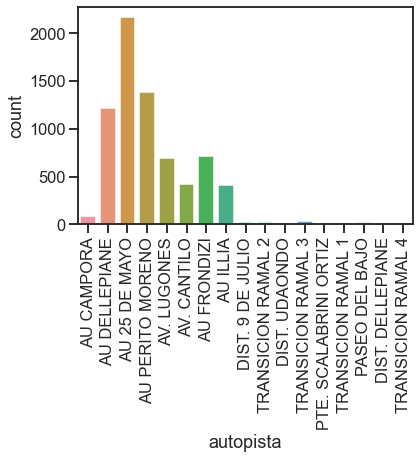

In [249]:
g = sns.countplot(x="autopista", data=google_df) 
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [251]:
sumarizados = pd.DataFrame(columns=["lesionados_fallecidos"])
sumarizados["lesionados_fallecidos"] = google_df["fallecidos"] + google_df["lesionados"]
google_df = pd.concat([google_df, sumarizados], axis = 1)
google_df = google_df.drop("lesionados", axis=1);
google_df = google_df.drop("fallecidos", axis=1);

In [252]:
google_df['moto'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [253]:
google_df['moto'] = google_df['moto'].astype(int)

In [254]:
sumando = pd.DataFrame(columns=["cantidad_de_vehiculos"])
sumando["cantidad_de_vehiculos"] = google_df["moto"] + google_df["liviano"] + google_df["bus"] + google_df["camion"]

google_df = pd.concat([google_df, sumando], axis = 1)
google_df['cantidad_de_vehiculos'] = google_df['cantidad_de_vehiculos'].astype(int)

In [255]:
# Se muestra la columna de cantidad de vehiculos
google_df.head()

,fecha,hora,autopista,condiciones_meteorologicas,tipo_de_siniestro,moto,liviano,bus,camion,index,diasemanal,year,lesionados_fallecidos,cantidad_de_vehiculos
0,2014-01-01,1,AU CAMPORA,BUENO,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,0,Wednesday,2014,1,1
1,2014-01-01,3,AU DELLEPIANE,BUENO,COLISION CON OBSTACULO FIJO,0,1.0,0.0,0.0,1,Wednesday,2014,0,1
2,2014-01-01,22,AU 25 DE MAYO,BUENO,COLISION CON DOS O MAS VEHICULOS,0,2.0,0.0,0.0,2,Wednesday,2014,8,2
3,2014-03-01,7,AU CAMPORA,BUENO,OBSTACULO NO FIJO,0,0.0,0.0,1.0,3,Saturday,2014,0,1
4,2014-03-01,21,AU PERITO MORENO,BUENO,COLISION CON OBSTACULO FIJO,0,2.0,0.0,0.0,4,Saturday,2014,1,2


In [256]:
google_df.loc[google_df.lesionados_fallecidos < 1, 'lesionados_fallecidos'] = 0 
google_df.loc[google_df.lesionados_fallecidos > 0, 'lesionados_fallecidos'] = 1

In [257]:
# Se Dummifica el Dataset y eliminamos las columnas categoricas
google_df = google_df.drop("fecha", axis=1)
google_df = google_df.drop("year", axis=1)
google_df = google_df.drop("index", axis=1)

dummys = pd.get_dummies(google_df, prefix="dumm_")
dummys.drop(dummys.columns[0:7], axis=1, inplace=True)
google_df = pd.concat([google_df, dummys], axis = 1)


google_df = google_df.drop("autopista", axis=1)
google_df = google_df.drop("condiciones_meteorologicas", axis=1)
google_df = google_df.drop("tipo_de_siniestro", axis=1)
google_df = google_df.drop("diasemanal", axis=1)

In [258]:
google_df.columns.all

<bound method Index.all of Index(['hora', 'moto', 'liviano', 'bus', 'camion', 'lesionados_fallecidos',
       'cantidad_de_vehiculos', 'dumm__AU 25 DE MAYO', 'dumm__AU CAMPORA',
       'dumm__AU DELLEPIANE', 'dumm__AU FRONDIZI', 'dumm__AU ILLIA',
       'dumm__AU PERITO MORENO', 'dumm__AV. CANTILO', 'dumm__AV. LUGONES',
       'dumm__DIST. 9 DE JULIO', 'dumm__DIST. DELLEPIANE',
       'dumm__DIST. UDAONDO', 'dumm__PASEO DEL BAJO',
       'dumm__PTE. SCALABRINI ORTIZ', 'dumm__TRANSICION RAMAL 1',
       'dumm__TRANSICION RAMAL 2', 'dumm__TRANSICION RAMAL 3',
       'dumm__TRANSICION RAMAL 4', 'dumm__', 'dumm__BUENO', 'dumm__LLUVIOSO',
       'dumm__NIEBLA, BRUMA O HUMO', 'dumm__VIENTOS FUERTES',
       'dumm__COLISION CON DOS O MAS VEHICULOS',
       'dumm__COLISION CON OBSTACULO FIJO', 'dumm__OBSTACULO NO FIJO',
       'dumm__SINIESTRO DE UN SOLO VEHICULO / SIN COLISION', 'dumm__Friday',
       'dumm__Monday', 'dumm__Saturday', 'dumm__Sunday', 'dumm__Thursday',
       'dumm__Tuesday', 

In [259]:
google_df.dtypes

hora                                                    int32
moto                                                    int32
liviano                                               float64
bus                                                   float64
camion                                                float64
lesionados_fallecidos                                   int32
cantidad_de_vehiculos                                   int32
dumm__AU 25 DE MAYO                                     uint8
dumm__AU CAMPORA                                        uint8
dumm__AU DELLEPIANE                                     uint8
dumm__AU FRONDIZI                                       uint8
dumm__AU ILLIA                                          uint8
dumm__AU PERITO MORENO                                  uint8
dumm__AV. CANTILO                                       uint8
dumm__AV. LUGONES                                       uint8
dumm__DIST. 9 DE JULIO                                  uint8
dumm__DI

In [260]:
google_df.head()

,hora,moto,liviano,bus,camion,lesionados_fallecidos,cantidad_de_vehiculos,dumm__AU 25 DE MAYO,dumm__AU CAMPORA,dumm__AU DELLEPIANE,...,dumm__COLISION CON OBSTACULO FIJO,dumm__OBSTACULO NO FIJO,dumm__SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,dumm__Friday,dumm__Monday,dumm__Saturday,dumm__Sunday,dumm__Thursday,dumm__Tuesday,dumm__Wednesday
0,1,0,1.0,0.0,0.0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,3,0,1.0,0.0,0.0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,22,0,2.0,0.0,0.0,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,0,0.0,0.0,1.0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,21,0,2.0,0.0,0.0,1,2,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [261]:
# Se procesa la Separacion Training y Test Set
y = google_df.iloc[:,5]

x = google_df.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

In [262]:
x

,hora,moto,liviano,bus,camion,cantidad_de_vehiculos,dumm__AU 25 DE MAYO,dumm__AU CAMPORA,dumm__AU DELLEPIANE,dumm__AU FRONDIZI,...,dumm__COLISION CON OBSTACULO FIJO,dumm__OBSTACULO NO FIJO,dumm__SINIESTRO DE UN SOLO VEHICULO / SIN COLISION,dumm__Friday,dumm__Monday,dumm__Saturday,dumm__Sunday,dumm__Thursday,dumm__Tuesday,dumm__Wednesday
0,1,0,1.0,0.0,0.0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,3,0,1.0,0.0,0.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,22,0,2.0,0.0,0.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,0,0.0,0.0,1.0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,21,0,2.0,0.0,0.0,2,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,18,1,0.0,0.0,0.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7299,18,1,0.0,0.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7300,8,0,4.0,0.0,0.0,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7301,17,0,1.0,0.0,0.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [263]:
y

0       1
1       0
2       1
3       0
4       1
       ..
7298    1
7299    1
7300    0
7301    0
7302    0
Name: lesionados_fallecidos, Length: 7242, dtype: int32

In [264]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)

In [265]:
xtrain.shape

(5793, 39)

In [266]:
xtest.shape

(1449, 39)

In [267]:
norm = MinMaxScaler().fit(xtrain)

In [268]:
type(xtrain_scal)

numpy.ndarray

Text(0.5, 1.0, 'Test data')

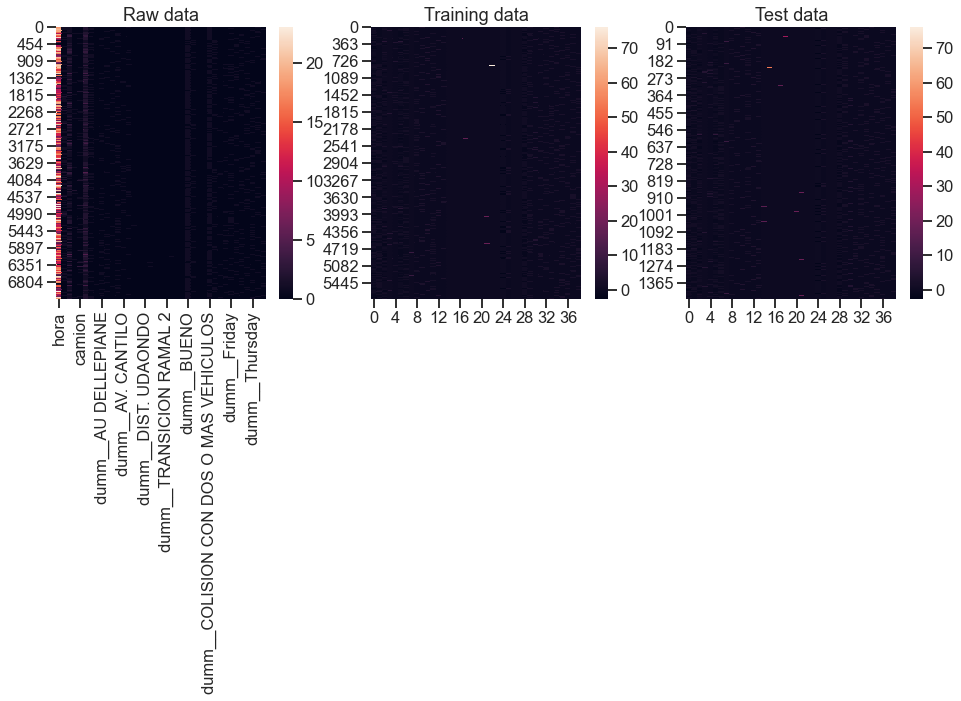

In [270]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Training data')
axs[2].set_title('Test data')

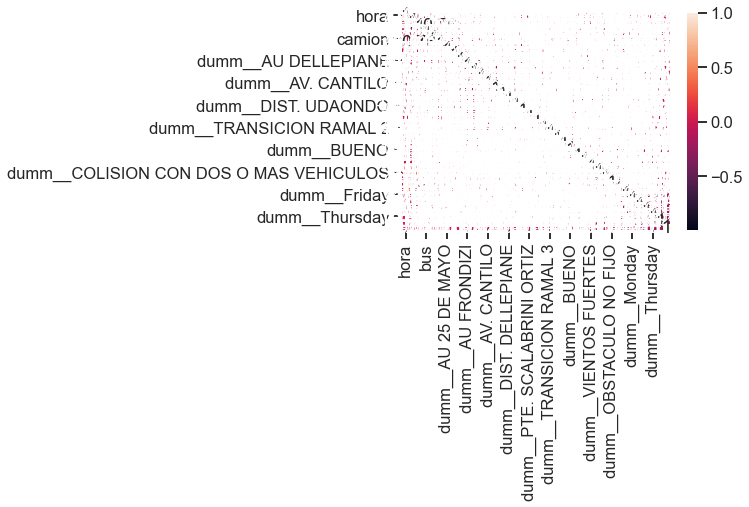

In [271]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(x.corr(),annot=True)
plt.show()

### No existe correlacion entre los distintos tipos de vehiculos

In [272]:
# modelos KNN
neigh = KNeighborsClassifier(n_neighbors=23)
neigh.fit(xtrain, ytrain)
ypred = neigh.predict(xtest)

### Se calcula el accuracy y el AUC para poder comparar el ytest vs ypred.

In [273]:
# Calculamos el accuracy
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.7543133195307108


In [274]:
# calcual UAC
fpr1, tpr1, thresholds = roc_curve(ytest, ypred, pos_label=1)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.7359566003187548


### Se realiza la matriz de confusión para visualizar los True Negative y los True Positive

In [275]:
cm = confusion_matrix(ytest, ypred)
cm

array([[718, 145],
       [211, 375]], dtype=int64)

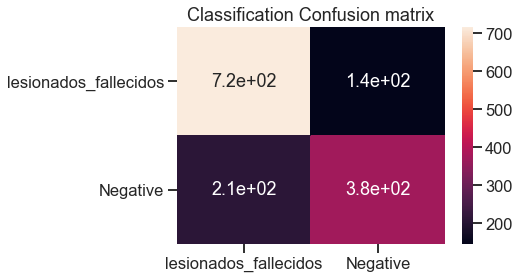

In [276]:
confusionm = confusion_matrix(ytest, ypred)
confusionmat = pd.DataFrame(confusionm, index = ['lesionados_fallecidos', 'Negative'], columns = ['lesionados_fallecidos', 'Negative'])
plt.figure(figsize = (6,4))
sns.heatmap(confusionmat, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

### Se muestra la correlacion de la cantidad de vehiculos y tipo de vehiculos

In [277]:
a = google_df.iloc[:,[1,2,3,4,6]]

In [278]:
a

,moto,liviano,bus,camion,cantidad_de_vehiculos
0,0,1.0,0.0,0.0,1
1,0,1.0,0.0,0.0,1
2,0,2.0,0.0,0.0,2
3,0,0.0,0.0,1.0,1
4,0,2.0,0.0,0.0,2
...,...,...,...,...,...
7298,1,0.0,0.0,0.0,1
7299,1,0.0,0.0,0.0,1
7300,0,4.0,0.0,0.0,4
7301,0,1.0,0.0,0.0,1


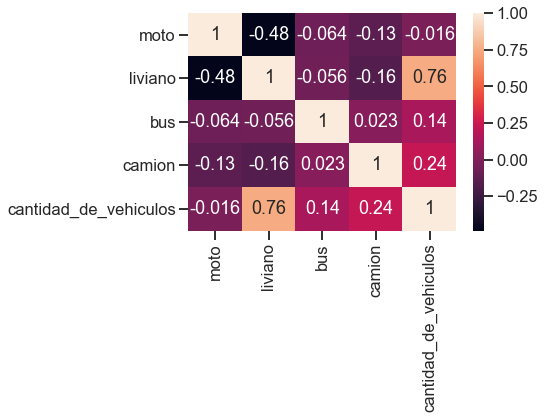

In [279]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(a.corr(),annot=True)
plt.show()

## Se analiza como se incrementa el error cuadrático a medida que se aumenta el valor de K.

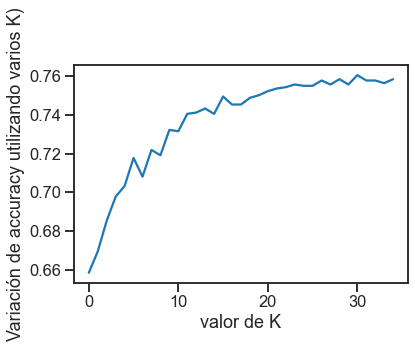

In [280]:
iteraciones_knn = 35
acc_knn = np.zeros(iteraciones_knn)

for r in range(0,iteraciones_knn):
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain,ytrain)
    ypred_knn = neigh.predict(xtest)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)
    
# imprimimos en pantalla el la raiz cuadrada del error cuadratico medio a medida que aumentamos el valor de K
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando varios K)")
plt.show()

In [281]:
# Se utiliza SVM
parameters = {'kernel':('linear','rbf'), 'C':[1,.05,0.01], 'gamma':[.001,.005,1], "degree":[2,4,8], "coef0":[0.001, 0.1,1]}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid = parameters, refit = True, cv = 2)
clf.fit(xtrain, ytrain.ravel())

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [1, 0.05, 0.01], 'coef0': [0.001, 0.1, 1],
                         'degree': [2, 4, 8], 'gamma': [0.001, 0.005, 1],
                         'kernel': ('linear', 'rbf')})

## Calculamos el accuracy y el AUC para poder comparar el ytest vs ypred.

In [282]:
ypred=clf.predict(xtest)
print(clf.score(xtest,ytest.ravel()))

0.7701863354037267


## Se realiza la matriz de confusión para visualizar los True Negative y los True Positive

In [283]:
cm = confusion_matrix(ytest, ypred)
cm

array([[730, 133],
       [200, 386]], dtype=int64)

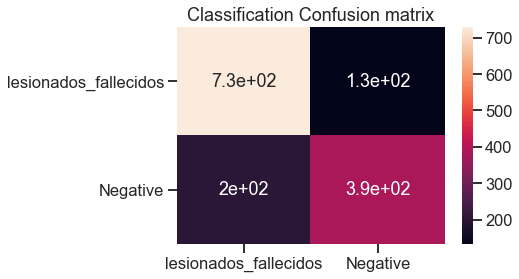

In [284]:
confusionm = confusion_matrix(ytest, ypred)
confusionmat = pd.DataFrame(confusionm, index = ['lesionados_fallecidos', 'Negative'], columns = ['lesionados_fallecidos', 'Negative'])
plt.figure(figsize = (6,4))
sns.heatmap(confusionmat, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

In [285]:
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

fpr1, tpr1, thresholds = roc_curve(ytest, ypred, pos_label=1)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El accuracy es 0.7701863354037267
El AUC es = 0.7522947571571509


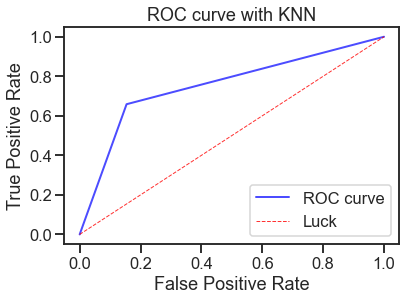

In [286]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()